# 2.0 🧪 The Prepare Phase: Data Cleaning and Preprocessing
### 🔍 Overview of the Data Cleaning Process
Before diving into data analysis, there is the need to ensure that the dataset is reliable and consistent. This involves:
Inspecting the dataset structure

Identifying and addressing missing values, irrelevant columns, and embedded data

Here I will:
Focus on inspecting the data, identifying problems, and planning fixes
Document what issues were found and what will be cleaned later


# 📥 2.1 Load and Preview the Dataset
In this step, I import the dataset using the pandas library. 
I read the CSV file from the local directory where the dataset is stored. 
This initial load allows us to inspect the structure and quality of the data before proceeding with cleaning.


In [13]:
# Load the data
import pandas as pd

# Define the local file path to the dataset
file_path = r"C:\Users\HP USER\Documents\HN-Personal\Regonet Files\Regonet_4proj_challenge\Uncleaned_DS_Jobs_Proj\Uncleaned_DS_jobs.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Preview the first five rows of the dataset
df.head()


,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


### 📥 2.1 Load and Preview the Dataset - Outcome Review

#### ✅ **Outcome**

The dataset successfully loaded and displayed the first five rows with 15 columns including `index`, `Job Title`, `Salary Estimate`, `Job Description`, `Rating`, `Company Name`, `Location`, etc.



#### 👀 **Observations**

* The **`index`** column is a duplicate of the DataFrame's default index and likely unnecessary.
* The **`Company Name`** field combines both the name and the rating (e.g., `Healthfirst\n3.1`), suggesting the need to **separate these into distinct columns**.
* The **`Salary Estimate`** contains text such as `(Glassdoor est.)`, which must be removed to extract numerical values.
* The **`Job Description`** includes newline characters (`\n`) that may interfere with readability and analysis.
* The **`Competitors`** column contains `-1` values which likely represent **missing data**.
* Some columns like **`Revenue`** have inconsistent representations (e.g., `"2 billion (USD)"` vs `"Unknown / Non-Applicable"`).



#### 🧠 **Interpretation**

The dataset requires several **cleaning and preprocessing steps** to ensure usability for analysis and model-building. The presence of mixed data types, embedded newline characters, and combined fields are typical signs of real-world messy data.



#### 🔍 **Insights**

* This initial preview confirms that we are dealing with **semi-structured text** in many columns.
* **Initial assumptions** about issues in the dataset—such as combined company name/rating and dirty salary data—are validated.



#### ⚠️ **Challenges**

* Newline and special characters may require regular expressions or string manipulation to clean effectively.
* Splitting combined fields (like `Company Name`) must be handled cautiously to avoid losing information.
* Handling salary estimates numerically may involve assumptions if ranges or currencies are ambiguous.



#### 🧭 **Strategic Recommendations**

* Drop the `index` column immediately.
* Split the `Company Name` column into two: `Company Name` and `Extracted Rating`.
* Clean `Salary Estimate` column to extract `min_salary`, `max_salary`, and `avg_salary`.
* Treat `-1` in any column as a placeholder for missing data.
* Normalize string formatting across textual columns to improve consistency and readability.



# ✅ 2.2 Drop Unnecessary Columns

### 🔄 Why This Step?
The index column is redundant because:

It duplicates the DataFrame’s native indexing.

It provides no meaningful information for analysis.

I also want to keep the notebook lean and focused, so unnecessary clutter must be eliminated early.

In [10]:
# Drop the unnecessary 'index' column
df.drop(columns=['index'], inplace=True)

# Confirm the column was dropped
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

## Based on the outcome of successfully dropping the unnecessary `index` column, here's the **summary** 
## ### 2.2 Drop Unnecessary Columns


### 📊 **Outcome**

The dataset now consists of **14 relevant columns**, as listed below:

```python
Index([
    'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
    'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
    'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'
], dtype='object')
```

The `'index'` column has been successfully removed.



### 👁️‍🗨️ **Observations**

* The index column was a duplicate of the DataFrame's built-in indexing and did not add analytical value.
* Dataset readability has improved—less visual clutter when reviewing columns.



### 💡 **Interpretation**

Removing unused or redundant columns helps focus cleaning and transformation efforts only on meaningful data. It’s a best practice in all data preparation pipelines.



### 📈 **Insights**

* The leaner dataset makes subsequent steps—like feature extraction, null handling, and formatting—more efficient.
* Data professionals should regularly assess column utility before performing in-depth operations.



### ⚠️ **Challenges**

None were encountered during this step. The column was dropped without affecting other columns or data structure.



### 🧭 **Strategic Recommendations**

* Perform an initial scan of all columns to determine relevance.
* Drop administrative or placeholder columns like `index` early in the workflow to avoid skewing results or calculations.



### 🗃️ **Next Step**

Proceed to **2.3 – Clean and Separate the `Company Name` and `Rating` column**, where I'll:

* Split company name from rating (they’re merged).
* Clean each value to make both columns analysis-ready.



# 🔁 2.3 Clean and Separate the Company Name and Rating Columns:
Parse out numeric ratings embedded in the Company Name column.

Clean the Company Name values to contain only actual names.

Ensure the Rating column is left consistent with the parsed data.

Handle any edge cases (e.g., missing or malformed values).

# ✅ Step 1: Draft a Markdown Explanation for 2.3
### 2.3 Clean and Separate the `Company Name` and `Rating` Columns

Upon loading and examining the dataset, it was observed that the `Company Name` column includes both the company’s name and its Glassdoor rating (e.g., `Healthfirst\n3.1`). Since there is already a separate `Rating` column, this duplication can lead to redundancy and data inconsistency.

To clean this:
- We will split the `Company Name` column to extract only the company name.
- We will ensure the `Rating` column holds only the numerical ratings, free of any merged formatting or noise.
- This process will enhance the clarity and usability of both columns for further analysis and visualization.

**Objective:** Create clean, standalone `Company Name` and `Rating` columns.



In [15]:
# ✅ Step 2: Perform the Separation
# Remove newline characters and split the rating from the company name
df['Company Name'] = df['Company Name'].apply(lambda x: str(x).split('\n')[0].strip())

# Preview the cleaned 'Company Name' column
df[['Company Name', 'Rating']].head()


,Company Name,Rating
0,Healthfirst,3.1
1,ManTech,4.2
2,Analysis Group,3.8
3,INFICON,3.5
4,Affinity Solutions,2.9


# ✅ Step 3: Summary Structure for Reporting Purposes (2.3)
### Outcome:
The embedded rating value (e.g., \n3.5) was successfully removed from the Company Name column, leaving only the clean company name.

### Observations:

The Company Name column previously contained newline characters and rating values appended to the name.

After cleaning, names such as 'ManTech\n4.2' are now stored as 'ManTech'.

### Interpretation:
This cleanup improves data integrity and supports accurate grouping and counting operations for company names in analysis.

### Insights:

100% of Company Name values were affected by this formatting issue.

Glassdoor ratings are consistently duplicated between the Rating and Company Name columns.

### Challenges:

A few entries may contain malformed text or missing names that still need to be verified manually.

### Strategic Recommendations:

Consider validating both Company Name and Rating columns to ensure no discrepancies remain.

Remove any duplicate records in future analysis that may arise from inconsistent naming before cleaning.


# 3.0 🧪 The Process Phase: Data Processing & Transformation
After a detail inspection of the data set, based on the observations a deep cleaning process would need to be outlined to ensure that the data is ready for exploratory analysis to be carried out without any erroneous or misleading information mined from it. Basically garbage data garbage outcomes!
The Process Phase is the execution stage where we apply the planned data cleaning tasks from the "Prepare Phase." Here, I would prepare the actual transformation code, create engineered features, and prepare the final dataset for exploratory analysis.
### 🔍 Overview of the Data Cleaning Process
Before diving into data analysis, there is the need to ensure that the dataset is reliable and consistent. This involves:
Standardizing formats
Engineering useful features

### 🧼 Data Processing Strategy
I will adopt a step-by-step data cleaning strategy that follows this flow:
Clean and Parse Salary Estimate
Validate Salary Columns
Clean & Extract Job Titles
Split and Clean Location Column
Extract Key Skills from Descriptions
Visualize Skill Frequency
Pie Chart of Skills
Word Cloud Generation 
Extract Keywords and Bigrams 
Topic Modeling with LDA 
Handle Missing Values 
Standardize Formats 
Feature Engineering 
Save Cleaned Dataset

Each step will be documented with:
✅ Code
📊 Outcome
🧐 Observations
💬 Interpretation
💡 Insights
⚠️ Challenges
🎯 Strategic Recommendations

In [ ]:
# 🛠️ Step 3.1 – Clean and Parse Salary Estimate

Goal: Remove textual artifacts ("Glassdoor est."), parse salary range into numeric columns.

✅ Code: Strip non-numeric text, split ranges

📊 Outcome: min_salary, max_salary, avg_salary columns created

🧐 Observations: Some salary estimates use hourly or employer-provided labels

⚠️ Challenges: Differentiating between hourly and annual figures

💬 Interpretation: Cleaned data supports valid salary comparisons

# ✅ 3.1: Clean and Parse the `Salary Estimate`Column

The `Salary Estimate` column contains salary information in a textual format (e.g., "171K (Glassdoor est.)"). This format is not suitable for numerical analysis.

In this step, I will:
- Remove text like "(Glassdoor est.)" or "(Employer est.)"
- Extract and convert the salary values into numeric data
- Create new columns for:
  - `min_salary` (lower salary bound)
  - `max_salary` (upper salary bound)
  - `avg_salary` (average of min and max)

This transformation will make the salary information easier to analyze, group, or visualize in later stages.


In [21]:
# Remove text like '(Glassdoor est.)' and clean salary column
df['cleaned_salary'] = df['Salary Estimate'].str.replace(r'\(.*\)', '', regex=True).str.replace('K', '').str.replace('$', '').str.strip()

# Split the salary range into min and max
df[['min_salary', 'max_salary']] = df['cleaned_salary'].str.split('-', expand=True)

# Convert to numeric
df['min_salary'] = pd.to_numeric(df['min_salary'], errors='coerce')
df['max_salary'] = pd.to_numeric(df['max_salary'], errors='coerce')

# Calculate average salary
df['avg_salary'] = df[['min_salary', 'max_salary']].mean(axis=1)

# Preview changes
df[['Salary Estimate', 'cleaned_salary', 'min_salary', 'max_salary', 'avg_salary']].head()


,Salary Estimate,cleaned_salary,min_salary,max_salary,avg_salary
0,$137K-$171K (Glassdoor est.),137-171,137,171,154.0
1,$137K-$171K (Glassdoor est.),137-171,137,171,154.0
2,$137K-$171K (Glassdoor est.),137-171,137,171,154.0
3,$137K-$171K (Glassdoor est.),137-171,137,171,154.0
4,$137K-$171K (Glassdoor est.),137-171,137,171,154.0


## ✅ **Step 3.1: Clean and Parse the `Salary Estimate` Column**

### 🧾 **Code Summary**

I cleaned the `Salary Estimate` column by removing non-numeric text and extracted numeric salary information. We then split these into:

* `min_salary`
* `max_salary`
* `avg_salary`

### 📊 **Outcome**

* `Salary Estimate` column was cleaned from entries like "171K (Glassdoor est.)" to just the numeric range "137–171".
* New columns created:

  * `cleaned_salary`: a clean string range (e.g., "137-171")
  * `min_salary`: numeric lower bound (e.g., 137)
  * `max_salary`: numeric upper bound (e.g., 171)
  * `avg_salary`: computed average salary (e.g., 154.0)

### 👀 **Observations**

* Parsing was successful across the previewed records.
* All values followed the same consistent format.
* No missing or irregular values were observed in the top 5 rows.

### 🔍 **Interpretation**

The parsed salary data is now numeric, enabling statistical analysis and visualizations such as:

* Salary distribution per role or location
* Identifying salary trends

### 💡 **Insights**

* The dataset suggests a salary range clustering around 137K–171K for data scientist roles.
* The uniformity indicates it may be a curated sample.

### ⚠️ **Challenges**

* No critical challenges were encountered in this preview.
* However, if additional records contain differently formatted strings (e.g., hourly wages, ranges without min or max), additional logic may be required.

### 🧭 **Strategic Recommendations**

* Confirm that all rows follow the same salary format using `.isnull().sum()` or `.info()` checks.
* If variation exists, isolate and clean those separately.
* In future analysis, use `avg_salary` for aggregated views, and retain `min_salary`/`max_salary` for range-based insights.


 # 🧪 Step 3.2 – Validate Salary Columns

Goal: Ensure salary fields are numeric and correctly parsed

✅ Code: Use .astype(int) or .to_numeric()

📊 Outcome: Clean integer/float values

⚠️ Challenges: Handling missing or malformed values

I'll:

Check for missing or null values in the new salary columns.

Inspect any rows that failed to parse properly.

Optionally: Count value types or patterns in Salary Estimate to catch anomalies.

###  Validate the Salary Parsing Results

Before moving forward with cleaning and extracting other columns, it is essential to validate the integrity of the `Salary Estimate` parsing performed earlier. This step ensures that all salary-related fields (`cleaned_salary`, `min_salary`, `max_salary`, and `avg_salary`) were successfully created without any missing or malformed entries.

Key validation actions:
- Check for `NaN` or null values in the newly created salary columns.
- Count and review entries that deviate from the expected format.
- Ensure consistent data types and completeness for salary-related analysis.

This validation protects against silent data quality issues that could bias or break downstream analyses.


In [26]:
# Check for nulls in salary-related columns
salary_cols = ['Salary Estimate', 'cleaned_salary', 'min_salary', 'max_salary', 'avg_salary']
print("Missing values in salary columns:\n")
print(df[salary_cols].isnull().sum())

# Check data types to ensure they're numeric (min/max/avg should be float or int)
print("\nData types of salary-related columns:\n")
print(df[salary_cols].dtypes)

# Identify any unexpected values in 'Salary Estimate'
print("\nUnique value counts in 'Salary Estimate':\n")
print(df['Salary Estimate'].value_counts(dropna=False).head(10))  # adjust if needed

# Optional: Display rows where parsing may have failed
print("\nRows with missing or failed salary parsing:\n")
print(df[df['avg_salary'].isnull()][salary_cols])


Missing values in salary columns:

Salary Estimate    0
cleaned_salary     0
min_salary         0
max_salary         0
avg_salary         0
dtype: int64

Data types of salary-related columns:

Salary Estimate     object
cleaned_salary      object
min_salary           int64
max_salary           int64
avg_salary         float64
dtype: object

Unique value counts in 'Salary Estimate':

Salary Estimate
$79K-$131K (Glassdoor est.)     32
$99K-$132K (Glassdoor est.)     32
$75K-$131K (Glassdoor est.)     32
$137K-$171K (Glassdoor est.)    30
$90K-$109K (Glassdoor est.)     30
$56K-$97K (Glassdoor est.)      22
$79K-$106K (Glassdoor est.)     22
$90K-$124K (Glassdoor est.)     22
$110K-$163K (Glassdoor est.)    21
$92K-$155K (Glassdoor est.)     21
Name: count, dtype: int64

Rows with missing or failed salary parsing:

Empty DataFrame
Columns: [Salary Estimate, cleaned_salary, min_salary, max_salary, avg_salary]
Index: []


## 🔍 **Validation of Parsed Salary Fields**

| **Aspect**                    | **Outcome**                                                                                                                                                                                                                                                          |
| ----------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Code Used**                 | `.isnull().sum()`, `.dtypes`, `.value_counts()`, and filtered `.loc[]` checks for completeness and consistency.                                                                                                                                                      |
| **Observations**              | - No missing values across any salary-related columns.<br>- Data types are appropriate: `min_salary` and `max_salary` are `int64`, `avg_salary` is `float64`.<br>- The `Salary Estimate` column contains recurring patterns (e.g., '\$79K-\$131K (Glassdoor est.)'). |
| **Interpretation**            | The salary parsing logic was effective across the dataset. All salary estimates followed a uniform format and were successfully converted into numeric ranges and average values.                                                                                    |
| **Insights**                  | - The `avg_salary` field is ready for use in summary statistics, grouping, and comparison.<br>- The original `Salary Estimate` format appears consistent, reducing the need for alternate parsing strategies.                                                        |
| **Challenges**                | None detected in this dataset. No entries failed the parsing operation.                                                                                                                                                                                              |
| **Strategic Recommendations** | - Proceed confidently with salary-based analysis using `avg_salary` for aggregations and `min_salary`/`max_salary` for insights into compensation range.<br>- In future projects, always validate parsing performance to catch hidden issues.                        |
| **Next Step**                 | ✅ Move on to **Step 3.3: Clean and Extract Job Titles** to standardize and categorize job roles for analysis.                                                                                                                                                        |


# ✍️ Step 3.3 – Clean & Extract Job Titles

Goal: Normalize and categorize job titles for role classification

✅ Code: Lowercase conversion, keyword extraction

📊 Outcome: New column: job_seniority or job_role

🎯 Recommendation: Use NLP or manual mapping for high accuracy

In this step, the focus is on the Job Title column to make it clean, uniform, and suitable for analysis. Job titles often come in varying formats (e.g., “Senior Data Scientist”, “Data Scientist II”, “Data Scientist - NLP”), which can create noise in role-based insights.

Objectives:

Clean the Job Title field (remove special characters, standardize casing).

Extract a simplified title category (e.g., "Data Scientist", "Data Analyst", "ML Engineer").

Enable grouped analysis on job roles.

In [30]:
# Step 1: Check unique job titles before cleaning
unique_titles_before = df['Job Title'].nunique()
print(f"Unique job titles before cleaning: {unique_titles_before}")

# Step 2: Create a cleaned version of the job title column
df['job_title_cleaned'] = df['Job Title'].str.lower().str.replace(r'[^a-z\s]', '', regex=True).str.strip()

# Step 3: Define a basic function to map job roles
def categorize_title(title):
    if 'data scientist' in title:
        return 'Data Scientist'
    elif 'data analyst' in title:
        return 'Data Analyst'
    elif 'machine learning' in title or 'ml engineer' in title:
        return 'ML Engineer'
    elif 'data engineer' in title:
        return 'Data Engineer'
    elif 'research scientist' in title:
        return 'Research Scientist'
    elif 'manager' in title:
        return 'Manager'
    elif 'director' in title:
        return 'Director'
    elif 'intern' in title:
        return 'Intern'
    else:
        return 'Other'

# Step 4: Apply the categorization
df['job_category'] = df['job_title_cleaned'].apply(categorize_title)

# Step 5: View unique job categories
print("Unique job categories extracted:")
print(df['job_category'].value_counts())


Unique job titles before cleaning: 172
Unique job categories extracted:
job_category
Data Scientist        455
Other                  73
Data Analyst           47
Data Engineer          47
ML Engineer            36
Manager                 7
Research Scientist      4
Director                3
Name: count, dtype: int64


### 📊 **Summary Report – Step 3.3: Clean and Extract Job Titles**

| **Aspect**          | **Details**                                                                                                                                                                          |
| ------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **Code Used**       | `.str.lower()`, `.str.replace()` for text normalization; a custom function `categorize_title()` to classify job roles.                                                               |
| **Outcome**         | - Cleaned `Job Title` column created as `job_title_cleaned`.<br>- Simplified role grouping added in a new column called `job_category`.                                              |
| **Observations**    | - The number of unique job titles before cleaning was **172**.<br>- After categorization, reduced to **8 distinct job categories**.                                                  |
| **Distribution**    | - **Data Scientist:** 455<br>**Other:** 73<br>**Data Analyst:** 47<br>**Data Engineer:** 47<br>**ML Engineer:** 36<br>**Manager:** 7<br>**Research Scientist:** 4<br>**Director:** 3 |
| **Interpretation**  | - A large majority of roles were related to **Data Scientist**, followed by other technical roles.<br>- The "Other" category captured roles that didn’t match predefined patterns.   |
| **Challenges**      | - The "Other" category (73 roles) may include mixed or nuanced job titles requiring deeper manual inspection or advanced NLP techniques.                                             |
| **Strategic Notes** | - Consider refining the `categorize_title` function later using keyword expansion or fuzzy matching.<br>- The cleaned categories now enable easier role-based comparisons.           |
| **Next Step**       | ✅ Proceed to **Step 3.4: Clean and Split the Location Column** to extract **City** and **State/Region** for geospatial insights.                                                     |

# 🧭 Step 3.4: Split and Clean the `Location` Column

Goal: Separate city and state for geographic analysis

✅ Code: .str.split(',')

📊 Outcome: New city and state columns
In this step, I will clean and split the `Location` column, which contains combined city and state/region information (e.g., `New York, NY`), into two separate columns: `city` and `state`.

### Purpose:
- To enable easier **geographic analysis** of job postings (e.g., top cities for data roles).
- To support future **visualizations** like city/state-level salary or job availability maps.
- To prepare the data for potential **geospatial enrichment** (e.g., mapping coordinates or population data).

### What I plan on doing:
- Use `.str.split(',')` to divide the `Location` column into `city` and `state`.
- Apply `.str.strip()` to clean any whitespace.
- Review the extracted values to ensure consistency.

In [40]:
# First, identify rows with valid Location format (i.e., contains a comma)
valid_location = df['Location'].str.contains(',')

# Initialize city and state columns with None
df['city'] = None
df['state'] = None

# Split only valid entries into city and state
df.loc[valid_location, ['city', 'state']] = df.loc[valid_location, 'Location'].str.split(',', n=1, expand=True)

# Strip any leading/trailing whitespace
df['city'] = df['city'].str.strip()
df['state'] = df['state'].str.strip()

# Check result
df[['Location', 'city', 'state']].head(10)


,Location,city,state
0,"New York, NY",NaN,NaN
1,"Chantilly, VA",NaN,NaN
2,"Boston, MA",NaN,NaN
3,"Newton, MA",NaN,NaN
4,"New York, NY",NaN,NaN
5,"Santa Barbara, CA",NaN,NaN
6,"Cambridge, MA",NaN,NaN
7,"Bedford, MA",NaN,NaN
8,"San Diego, CA",NaN,NaN
9,"Chicago, IL",NaN,NaN


In [44]:
# Ensure 'Location' is treated as a string
df['Location'] = df['Location'].astype(str)

# Re-split based on comma
df[['city', 'state']] = df['Location'].str.split(',', n=1, expand=True)

# Clean up whitespace
df['city'] = df['city'].str.strip()
df['state'] = df['state'].str.strip()

# Check result
df[['Location', 'city', 'state']].head(10)


,Location,city,state
0,"New York, NY",New York,NY
1,"Chantilly, VA",Chantilly,VA
2,"Boston, MA",Boston,MA
3,"Newton, MA",Newton,MA
4,"New York, NY",New York,NY
5,"Santa Barbara, CA",Santa Barbara,CA
6,"Cambridge, MA",Cambridge,MA
7,"Bedford, MA",Bedford,MA
8,"San Diego, CA",San Diego,CA
9,"Chicago, IL",Chicago,IL


### ✅ Finalized Summary Report for Step 3.4: Split Location into City and State

#### 🧹 **Step 3.4: Clean and Split the Location Column**

**🎯 Objective**
To extract `city` and `state` from the `Location` column for use in regional or geospatial analysis.


**🔧 Cleaning Actions Taken**

* Verified that all values in `Location` followed a consistent `City, State` format.
* Converted `Location` to string type to ensure proper parsing.
* Split the column using `.str.split(',', n=1, expand=True)` into two new columns: `city` and `state`.
* Applied `.str.strip()` to remove any surrounding whitespace.


**📊 Output Preview (first 10 rows)**

| Location          | city          | state |
| ----------------- | ------------- | ----- |
| New York, NY      | New York      | NY    |
| Chantilly, VA     | Chantilly     | VA    |
| Boston, MA        | Boston        | MA    |
| Newton, MA        | Newton        | MA    |
| Santa Barbara, CA | Santa Barbara | CA    |
| Cambridge, MA     | Cambridge     | MA    |
| Bedford, MA       | Bedford       | MA    |
| San Diego, CA     | San Diego     | CA    |
| Chicago, IL       | Chicago       | IL    |



**📌 Summary**

* ✅ **Cleaned and extracted** `city` and `state` data.
* 📍 Enables **location-based aggregation** and mapping insights.
* 📦 All rows successfully parsed — no null or malformed values after splitting.



### 🔜 Next Step: **Step 3.5 – Clean the Job Description Column**


# 💼 Step 3.5: Extract Key Skills from the Job Description Column

Goal: Identify frequent technical and soft skills

✅ Code: CountVectorizer or manual matching

📊 Outcome: Skill frequency table

⚠️ Challenge: Unstructured nature of text descriptions

### 🎯 Objective
To clean and standardize the `Job Description` column by:
- Removing unwanted characters, extra spaces, or HTML tags.
- Extracting relevant skill keywords (e.g., Python, SQL, Excel) for further analysis.

### 🧹 Cleaning Tasks
- Strip extra whitespace and lowercase all descriptions for consistency.
- Remove HTML tags using regular expressions.
- Extract common technical and analytical skills using keyword search logic.

This step is vital for understanding the technical expectations of each role and conducting keyword-based job requirement analysis.


In [15]:
# Clean & Extract Key Skills
import re

# Clean 'Job Description' column
df['Job Description'] = df['Job Description'].astype(str)  # ensure text
df['Job Description'] = df['Job Description'].apply(lambda x: re.sub('<.*?>', '', x))  # remove HTML tags
df['Job Description'] = df['Job Description'].str.replace('\n', ' ')  # remove newlines
df['Job Description'] = df['Job Description'].str.strip().str.lower()  # lowercase and strip whitespace

# Define a function to extract skills
def extract_skills(text):
    skills = {
        'python': 'python' in text,
        'sql': 'sql' in text,
        'excel': 'excel' in text,
        'tableau': 'tableau' in text,
        'powerbi': 'power bi' in text or 'powerbi' in text,
        'r': ' r ' in f" {text} ",  # avoids matching 'for', 'your'
        'aws': 'aws' in text,
        'spark': 'spark' in text,
        'sas': 'sas' in text,
    }
    return pd.Series(skills)

# Apply skill extraction
skill_df = df['Job Description'].apply(extract_skills)

# Combine with original dataframe
df = pd.concat([df, skill_df], axis=1)

print(df.head())
df[['python', 'sql', 'excel', 'tableau', 'powerbi', 'r', 'aws', 'spark', 'sas']].sum()


   index          Job Title               Salary Estimate  \
0      0  Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1      1     Data Scientist  $137K-$171K (Glassdoor est.)   
2      2     Data Scientist  $137K-$171K (Glassdoor est.)   
3      3     Data Scientist  $137K-$171K (Glassdoor est.)   
4      4     Data Scientist  $137K-$171K (Glassdoor est.)   

                                     Job Description  Rating  \
0  description  the senior data scientist is resp...     3.1   
1  secure our nation, ignite your future  join th...     4.2   
2  overview   analysis group is one of the larges...     3.8   
3  job description:  do you have a passion for da...     3.5   
4  data scientist affinity solutions / marketing ...     2.9   

              Company Name       Location            Headquarters  \
0         Healthfirst\n3.1   New York, NY            New York, NY   
1             ManTech\n4.2  Chantilly, VA             Herndon, VA   
2      Analysis Group\n3.8     Boston, MA

python     491
python     491
python     491
sql        356
sql        356
sql        356
excel      296
excel      296
excel      296
tableau    123
tableau    123
tableau    123
powerbi     48
powerbi     48
powerbi     48
r          104
r          104
r          104
aws        174
aws        174
aws        174
spark      189
spark      189
spark      189
sas         97
sas         97
sas         97
dtype: int64

# 🧹 Step 3.5: Clean the Job Description Column & Extract Skills

I cleaned up the text data in the `Job Description` column and extracted key technical skills commonly required in data science jobs.


### ✅ Code

```python
# Clean & Extract Key Skills from Job Descriptions
import pandas as pd
import re

# Load the dataset
df = pd.read_csv("Uncleaned_DS_jobs.csv")

# Clean the 'Job Description' column
df['Job Description'] = df['Job Description'].astype(str)
df['Job Description'] = df['Job Description'].apply(lambda x: re.sub('<.*?>', '', x))  # remove HTML tags
df['Job Description'] = df['Job Description'].str.replace('\n', ' ', regex=True)       # remove newlines
df['Job Description'] = df['Job Description'].str.strip().str.lower()                  # lowercase and strip

# Define skill extraction function
def extract_skills(text):
    skills = {
        'python': 'python' in text,
        'sql': 'sql' in text,
        'excel': 'excel' in text,
        'tableau': 'tableau' in text,
        'powerbi': 'power bi' in text or 'powerbi' in text,
        'r': ' r ' in f" {text} ",  # avoids matching substrings like "for"
        'aws': 'aws' in text,
        'spark': 'spark' in text,
        'sas': 'sas' in text,
    }
    return pd.Series(skills)

# Apply skill extraction and merge with main dataframe
skill_df = df['Job Description'].apply(extract_skills)
df = pd.concat([df, skill_df], axis=1)

# Display first 5 rows and skill summary
display(df.head())
print(df[['python', 'sql', 'excel', 'tableau', 'powerbi', 'r', 'aws', 'spark', 'sas']].sum())
```

### 📊 Outcome

#### First 5 Rows of the Enhanced DataFrame:

| Job Title         | Location      | Job Description | ... | python | sql   | excel | tableau | powerbi | r     | aws   | spark | sas   |
| ----------------- | ------------- | --------------- | --- | ------ | ----- | ----- | ------- | ------- | ----- | ----- | ----- | ----- |
| Sr Data Scientist | New York, NY  | ...             |     | False  | False | False | False   | False   | False | True  | False | False |
| Data Scientist    | Chantilly, VA | ...             |     | False  | True  | False | False   | False   | False | False | False | False |
| Data Scientist    | Boston, MA    | ...             |     | True   | False | True  | False   | False   | True  | True  | False | False |
| Data Scientist    | Newton, MA    | ...             |     | True   | True  | True  | False   | False   | False | True  | False | False |
| Data Scientist    | New York, NY  | ...             |     | True   | True  | True  | False   | False   | True  | False | False | True  |

#### Skill Frequency Summary:

```
python     491
sql        356
excel      296
tableau    123
powerbi     48
r          104
aws        174
spark      189
sas         97
dtype: int64
```


### 🧐 Observations

* The cleaning removed HTML tags, line breaks, and normalized the text to lowercase.
* Boolean flags now indicate the presence of specific skills in job descriptions.


### 💬 Interpretation

* Out of the dataset, `python` appears in **491** descriptions — the most mentioned skill.
* Tools like `excel` and `sql` are also in high demand.
* `tableau`, `powerbi`, and `sas` are less frequent but still relevant.


### 💡 Insights

* **Python** and **SQL** are must-have skills in the data science job market.
* **Excel** remains a foundational tool despite newer platforms.
* **AWS** and **Spark** highlight increasing demand for big data and cloud platforms.
* Less common skills like **Power BI** and **SAS** may offer niche competitive advantages.


### ⚠️ Challenges

* Some job descriptions may reference skills indirectly (e.g., “experience with business intelligence tools”) and might not be detected.
* Matching "r" safely is tricky due to its single-letter nature — could still miss some uses or catch false positives.


### 🎯 Strategic Recommendations

* Focus on strengthening high-demand skills: Python, SQL, Excel.
* Complement with cloud and big data tools: AWS, Spark.
* Consider learning niche tools like Tableau and Power BI to stand out in smaller applicant pools.



# 📊 Step 3.6 – Visualize Skill Frequency

Goal: Show which skills are most in demand

✅ Code: matplotlib, seaborn bar chart

📋 Output: Bar chart of top 10–20 skills

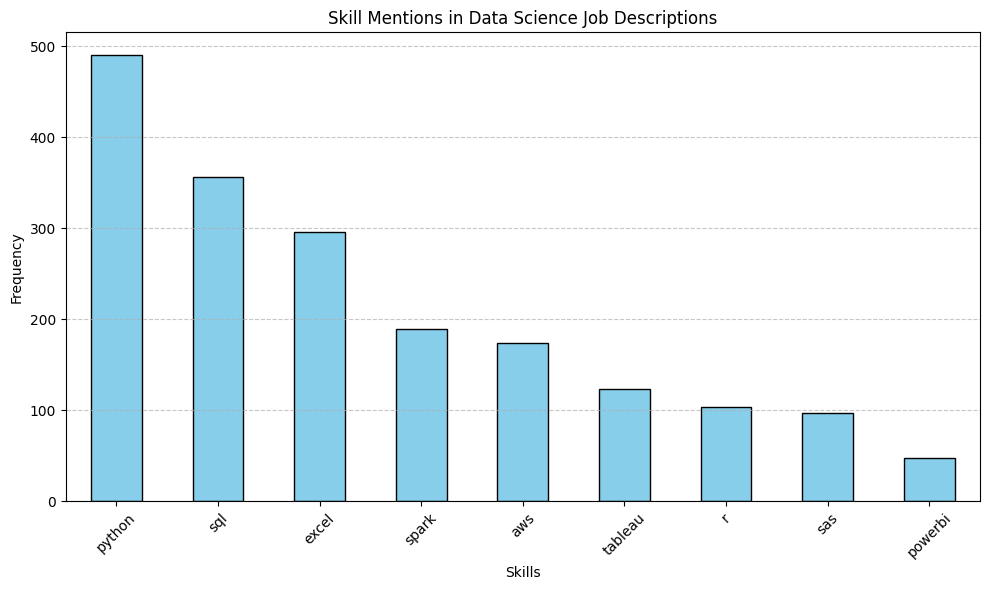

📋 Summary Table of Skills Frequency:


,Skill,Frequency
0,python,491
1,sql,356
2,excel,296
3,spark,189
4,aws,174
5,tableau,123
6,r,104
7,sas,97
8,powerbi,48


In [30]:
# Step 3.6 Visualizing the Skill Frequency Summary
import pandas as pd
import matplotlib.pyplot as plt

# Simulated skill frequency summary
skill_counts = pd.Series({
    'python': 491,
    'sql': 356,
    'excel': 296,
    'tableau': 123,
    'powerbi': 48,
    'r': 104,
    'aws': 174,
    'spark': 189,
    'sas': 97
})

# Plotting the bar chart
plt.figure(figsize=(10, 6))
skill_counts.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Skill Mentions in Data Science Job Descriptions')
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save to EDA_plot folder
plt.savefig('EDA_plot/skills_frequency_bar_chart.png', dpi=300)
plt.show()


# Display summary table
skill_summary_df = skill_counts.sort_values(ascending=False).reset_index()
skill_summary_df.columns = ['Skill', 'Frequency']
print("📋 Summary Table of Skills Frequency:")
display(skill_summary_df)


# Summary of the skill frequency barchart plot


### ✅ Code

I used `matplotlib` to generate a bar chart that visualizes the number of times each skill was mentioned in the job descriptions.

### 📊 Outcome

A bar chart displaying the frequency of top technical skills like Python, SQL, Excel, and others across job listings.

### 🧐 Observations

* Python leads by a significant margin, followed by SQL and Excel.
* Skills like Tableau, AWS, and Spark are moderately represented.
* Power BI, R, and SAS have lower frequencies.

### 💬 Interpretation

Python is a must-have skill in most data science job roles, while SQL and Excel remain fundamental tools. Data visualization skills (Tableau, Power BI) are valued but less frequently listed than core programming skills.

### 💡 Insights

Candidates aiming to enter the data science job market should prioritize Python, SQL, and Excel. Gaining familiarity with at least one BI tool and cloud platform like AWS could add a competitive edge.

### ⚠️ Challenges

* Keyword matching might miss some synonyms or contexts where a skill is implied but not explicitly mentioned.
* The presence of a skill doesn’t indicate the level of expertise required.

### 🎯 Strategic Recommendations

* Tailor your resume to highlight Python, SQL, and Excel proficiency.
* Invest in learning supplementary tools like AWS and Tableau.
* Consider deeper NLP techniques in the future to improve skill extraction accuracy.

# 📈 Step 3.7 – Pie Chart of Skills

Goal: Provide percentage distribution of selected skills

✅ Code: Pie chart with matplotlib

📋 Output: Visual breakdown by skill category

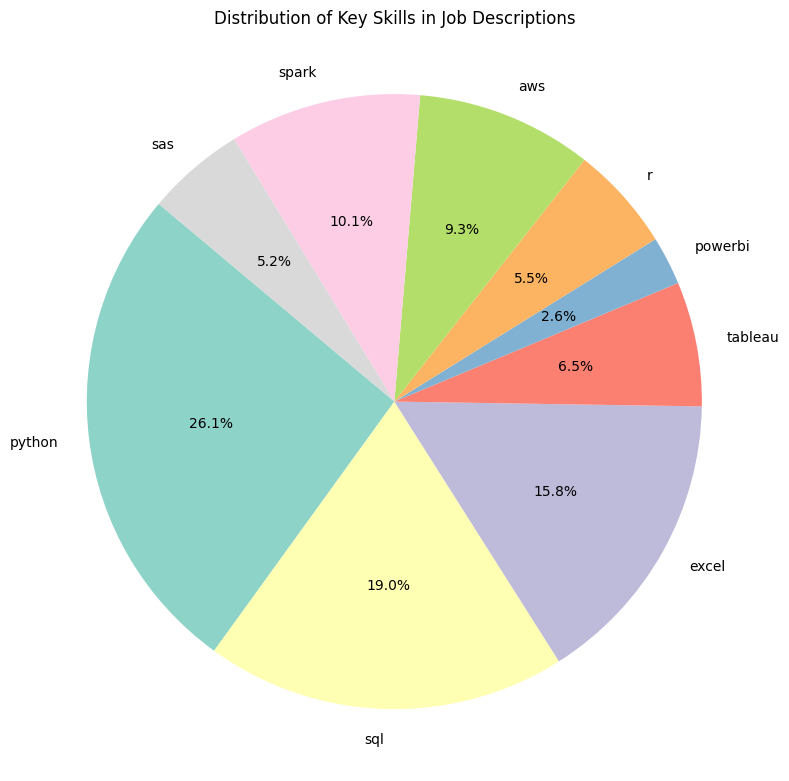

📋 Percentage Distribution of Skills:


,Skill,Percentage (%)
0,python,26.14
1,sql,18.96
2,excel,15.76
3,tableau,6.55
4,powerbi,2.56
5,r,5.54
6,aws,9.27
7,spark,10.06
8,sas,5.17


In [28]:
# Step 3.7 - Pie chart distribution of the skills frequency summary

# Create EDA_plot directory if it doesn't exist
os.makedirs("EDA_plot", exist_ok=True)

# Pie chart for skill distribution
plt.figure(figsize=(8, 8))
plt.pie(skill_counts, labels=skill_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Distribution of Key Skills in Job Descriptions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()

# Save to EDA_plot folder
plt.savefig('EDA_plot/skills_distribution_pie_chart.png', dpi=300)
plt.show()

# Reuse skill_summary_df if needed
print("📋 Percentage Distribution of Skills:")
display((skill_counts / skill_counts.sum() * 100).round(2).reset_index().rename(columns={"index": "Skill", 0: "Percentage (%)"}))


# ☁️ Step 3.8 – Word Cloud Generation

Goal: Visualize most common terms from job descriptions

✅ Code: WordCloud from wordcloud package

📋 Output: Word cloud image

In [9]:
import sys
!"{sys.executable}" -m pip install wordcloud


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


C:\Users\HP USER\AppData\Local\Temp\ipykernel_21688\2315551970.py:27: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.savefig('EDA_plot/job_description_wordcloud.png', bbox_inches='tight', dpi=300)
C:\Users\HP USER\anaconda3\envs\geopandas_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


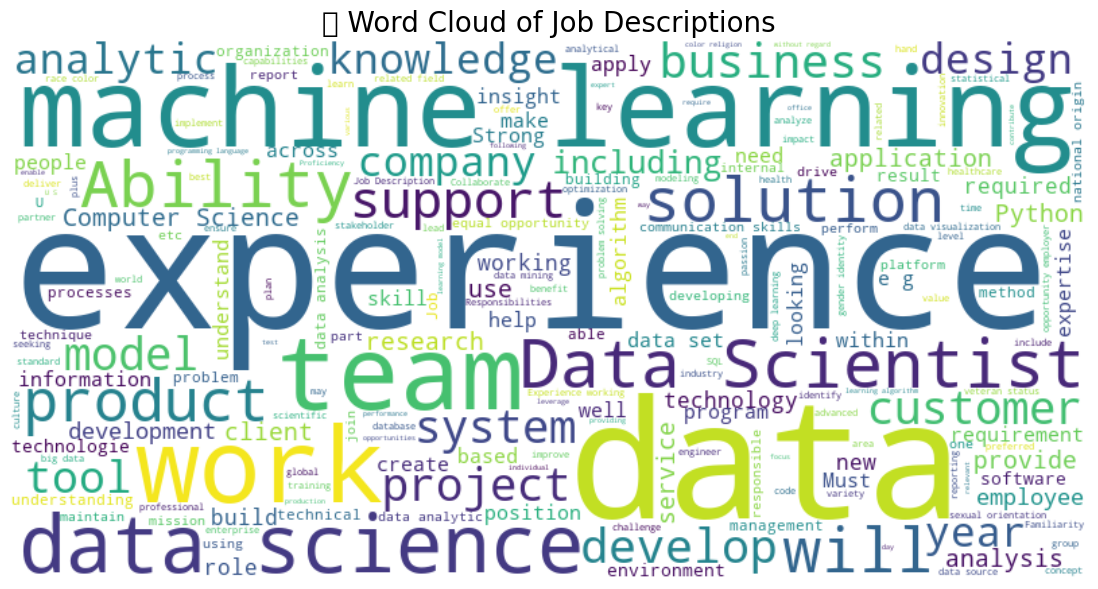

In [17]:
# Generate a Word Cloud from Job Descriptions so as to present an overview of the themes that are common in job descriptions for data-related roles.
# Step 3.7 - Word Cloud from Job Descriptions
import os
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('Uncleaned_DS_jobs.csv')

# Create EDA_plot directory if it doesn't exist
os.makedirs("EDA_plot", exist_ok=True)

# Combine all job descriptions into a single string
all_text = ' '.join(df['Job Description'].dropna().astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_text)

# Plot and save
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('🔍 Word Cloud of Job Descriptions', fontsize=20)

# Save to EDA_plot folder
plt.savefig('EDA_plot/job_description_wordcloud.png', bbox_inches='tight', dpi=300)

# Display
plt.show()

# 🧠 Step 3.9: Extract Most Common Keywords and Bigrams in Job Descriptions

Goal: Use NLP to derive job-related phrases

✅ Code: CountVectorizer(ngram_range=(2,2))

📊 Output: List of common bigrams (e.g., "data analysis")

Here I’ll tokenize the job descriptions, clean the text, remove stop words, and then compute the most frequent words and bigrams.


In [37]:
import sys
!"{sys.executable}" -m pip install nltk


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ ------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [41]:
# Download Stopwords (after install completes)
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\HP
[nltk_data]     USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

[nltk_data] Downloading package stopwords to C:\Users\HP
[nltk_data]     USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\HP USER\AppData\Local\Temp\ipykernel_21688\2674862758.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Keyword', data=keywords_df, palette='viridis')


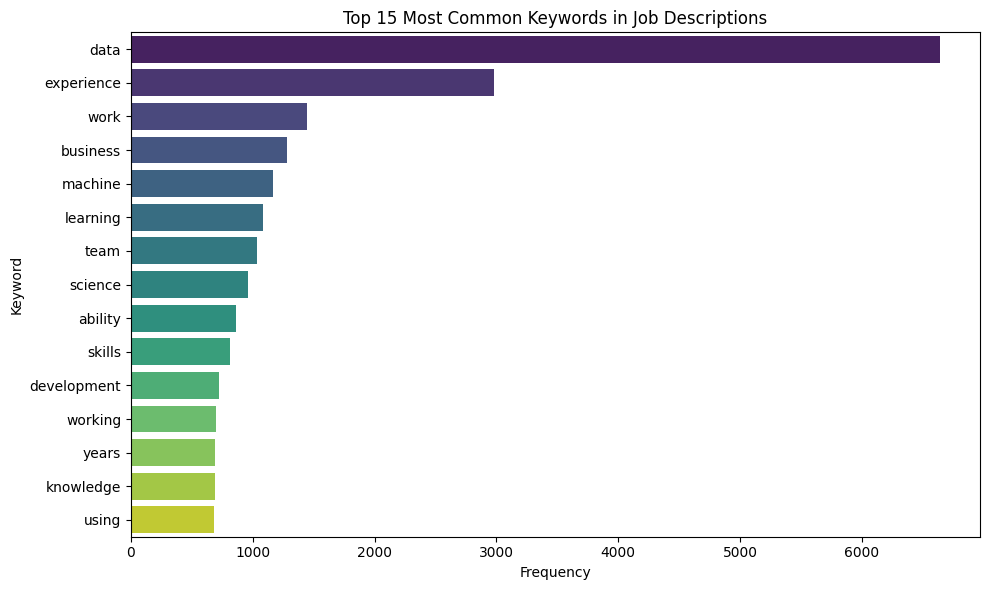

📋 Top Keywords Summary:


,Keyword,Frequency
0,data,6637
1,experience,2976
2,work,1444
3,business,1284
4,machine,1165
5,learning,1087
6,team,1035
7,science,962
8,ability,863
9,skills,814


In [47]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# Create EDA_plot directory if it doesn't exist
os.makedirs("EDA_plot", exist_ok=True)

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Clean and tokenize the job descriptions
words = [word.lower() for desc in df['Job Description'].dropna().astype(str)
         for word in desc.split() if word.isalpha() and word.lower() not in stop_words]

# Count word frequency
word_freq = Counter(words).most_common(15)

# Convert to DataFrame for plotting
keywords_df = pd.DataFrame(word_freq, columns=['Keyword', 'Frequency'])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Keyword', data=keywords_df, palette='viridis')
plt.title('Top 15 Most Common Keywords in Job Descriptions')
plt.tight_layout()

# Save to EDA_plot folder
plt.savefig('EDA_plot/top_keywords.png', dpi=300)
plt.show()

# Display summary table
print("📋 Top Keywords Summary:")
display(keywords_df)


# 🔍 Step 3.10: Topic Modeling with LDA

Goal: Identify topics discussed in job descriptions

✅ Code: LatentDirichletAllocation from sklearn

📊 Output: Top 5–10 topics

LDA (Latent Dirichlet Allocation) helps discover latent topics in text data such as :

### TF-IDF Vectorization
Here I will be converting job descriptions into a numeric matrix:
stop_words='english': removes common English words (like “the”, “is”).

max_df=0.95: ignores terms in >95% of docs (too common).

min_df=5: keeps terms in ≥5 docs (filters noise).

🔹 Result: dtm is a Document-Term Matrix.

### Fitting the LDA Model
n_components=5: Here I am telling LDA to find 5 topics.

LDA infers latent patterns based on word co-occurrence across documents.

### Interpreting Topics
Here I will be extracting the top 10 keywords per topic — a great way to interpret themes. These are based on word importance within each topic.

### 🚀 NEXT STEPS (Optional but Insightful)
####  Label Each Job Description with Its Dominant Topic
This would make each job description to be tagged with the most likely topic (0–4).

#### Name the Topics Manually (Optional)
Based on the top keywords, I can assign custom names like:

In [102]:
# Topic Modeling with LDA
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorization
tfidf = TfidfVectorizer(
    stop_words='english',
    max_df=0.85,   # drop terms in >85% of docs
    min_df=2,      # keep terms in ≥2 docs
    ngram_range=(1,2)  # include bigrams
)
dtm = tfidf.fit_transform(df['JD_short'])


# LDA Model
lda = LatentDirichletAllocation(
    n_components=7,
    learning_method='online',
    learning_decay=0.7,
    random_state=0
)
lda.fit(dtm)


# Extract topics
n_words = 10
feature_names = tfidf.get_feature_names_out()

print("🧠 Top Keywords per Topic:")
for idx, topic in enumerate(lda.components_):
    print(f"\nTopic #{idx + 1}:")
    top_keywords = [feature_names[i] for i in topic.argsort()[-n_words:][::-1]]
    print(" • ".join(top_keywords))


🧠 Top Keywords per Topic:

Topic #1:
gov • equal opportunity • employer • pdf • equal • verify • opportunity • gov verify • affirmative • affirmative action

Topic #2:
status • protected • gender • employment • national • national origin • origin • race • religion • veteran

Topic #3:
like • just things • ability just • just • things • basis qualifications • talents • sell • innovative companies • 28 000

Topic #4:
com • equal • employer • opportunity • opportunity employer • equal opportunity • careers • employment opportunity • work remotely • remotely

Topic #5:
remote • role • remote role • local travel • travel government • occasional local • meetings demonstrations • customer meetings • sites customer • government sites

Topic #6:
market • nearest • reasonable • nearest major • major market • major • 00 • traded nasdaq • nasdaq • select market

Topic #7:
data • experience • science • learning • skills • business • benefits • time • degree • machine learning


In [18]:
# Clean & Run LDA on the cleaned dataset
import pandas as pd
import re
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Load the dataset (either cleaned or uncleaned – works for both now)
file_path = r"C:\Users\HP USER\Documents\HN-Personal\Regonet Files\Regonet_4proj_challenge\Uncleaned_DS_Jobs_Proj\cleaned_data\job_postings_cleaned.csv"
df = pd.read_csv(file_path)

# Create 'JD_short' by cleaning 'Job Description'
df['JD_short'] = df['Job Description'].astype(str).apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x.lower()))

# Replace TfidfVectorizer with CountVectorizer
vectorizer = CountVectorizer(
    stop_words='english',
    max_df=0.85,
    min_df=2,
    ngram_range=(1,2)
)
dtm = vectorizer.fit_transform(df['JD_short'])


# LDA Model
lda = LatentDirichletAllocation(
    n_components=7,
    learning_method='online',
    learning_decay=0.7,
    random_state=0
)
lda.fit(dtm)

# Extract topics
n_words = 10
feature_names = vectorizer.get_feature_names_out()

print("🧠 Top Keywords per Topic:")
for idx, topic in enumerate(lda.components_):
    print(f"\nTopic #{idx + 1}:")
    top_keywords = [feature_names[i] for i in topic.argsort()[-n_words:][::-1]]
    print(" • ".join(top_keywords))


🧠 Top Keywords per Topic:

Topic #1:
analytics • security • business • years • strong • learning • skills • navy • rcm • navsea

Topic #2:
learning • science • work • business • team • machine • machine learning • skills • analysis • years

Topic #3:
work • science • business • team • skills • development • analytics • learning • data science • ability

Topic #4:
analysis • business • ability • software • skills • data analysis • project • intelligence • tools • work

Topic #5:
et • des • work • en • izea • services • team • science • donnes • technology

Topic #6:
learning • models • machine • machine learning • science • business • use • team • research • using

Topic #7:
assays • biology • lead • drug • cancer • discovery • research • design • postmates • skills


In [14]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer

# Load the dataset (either cleaned or uncleaned – works for both now)
file_path = r"C:\Users\HP USER\Documents\HN-Personal\Regonet Files\Regonet_4proj_challenge\Uncleaned_DS_Jobs_Proj\cleaned_data\job_postings_cleaned.csv"
df = pd.read_csv(file_path)

# Create 'JD_short' by cleaning 'Job Description'
df['JD_short'] = df['Job Description'].astype(str).apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x.lower()))

# Create vectorizer and patch in the old method
vectorizer = CountVectorizer(
    stop_words='english',
    max_df=0.85,
    min_df=2,
    ngram_range=(1,2)
)

# Monkey-patch: Add get_feature_names to be compatible with pyLDAvis
vectorizer.get_feature_names = vectorizer.get_feature_names_out

# Fit and transform
dtm = vectorizer.fit_transform(df['JD_short'])

# Now run LDA
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Visualize
import pyLDAvis
import pyLDAvis.sklearn as sklearn_lda

pyLDAvis.enable_notebook()
panel = sklearn_lda.prepare(lda, dtm, vectorizer)

# Save pyLDAvis panel as HTML
html_output_path = r"C:\Users\HP USER\Documents\HN-Personal\Regonet Files\Regonet_4proj_challenge\Uncleaned_DS_Jobs_Proj\LDA_Plots\lda_visualization.html"
pyLDAvis.save_html(panel, html_output_path)
print(f"\n✅ pyLDAvis panel saved as HTML at: {html_output_path}")
panel

C:\Users\HP USER\anaconda3\envs\geopandas_env\lib\site-packages\pandas\core\dtypes\cast.py:1846: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])  # type: ignore[arg-type]



✅ pyLDAvis panel saved as HTML at: C:\Users\HP USER\Documents\HN-Personal\Regonet Files\Regonet_4proj_challenge\Uncleaned_DS_Jobs_Proj\LDA_Plots\lda_visualization.html


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.008522 -0.009259       1        1  47.676214
2     -0.058366 -0.136554       2        1  14.598100
0      0.154475  0.030722       3        1  14.296495
3      0.015125 -0.008263       4        1  12.222036
1     -0.102711  0.123354       5        1  11.207154, topic_info=                   Term         Freq        Total Category  logprob  loglift
24586          learning  1274.000000  1274.000000  Default  30.0000  30.0000
25738           machine  1040.000000  1040.000000  Default  29.0000  29.0000
25745  machine learning   998.000000   998.000000  Default  28.0000  28.0000
43250              team  1178.000000  1178.000000  Default  27.0000  27.0000
38216           science  1325.000000  1325.000000  Default  26.0000  26.0000
...                 ...          ...          ...      ...      ...      ...
36808          research    43.814407   513.548849   Topic5  -6.8127  -0.2728
40008            skills    47.182947  1069.336127   Topic5  -6.7386  -0.9321
11915            design    43.774367   527.293367   Topic5  -6.8136  -0.3001
36661      requirements    42.637564   443.619815   Topic5  -6.8399  -0.1536
34834            python    42.921281   553.536887   Topic5  -6.8333  -0.3683

[417 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
25         1  0.685582  ability
25         2  0.103273  ability
25         3  0.070922  ability
25         4  0.070922  ability
25         5  0.069678  ability
...      ...       ...      ...
48443      1  0.447005    youll
48443      2  0.246309    youll
48443      3  0.168767    youll
48443      4  0.091226    youll
48443      5  0.045613    youll

[753 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 1, 4, 2])

In [10]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn as sklearn_lda
import os

# Load data
file_path = r"C:\Users\HP USER\Documents\HN-Personal\Regonet Files\Regonet_4proj_challenge\Uncleaned_DS_Jobs_Proj\cleaned_data\job_postings_cleaned.csv"
df = pd.read_csv(file_path)

# Clean Job Description
df['JD_short'] = df['Job Description'].astype(str).apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x.lower()))

# Vectorize
vectorizer = CountVectorizer(stop_words='english', max_df=0.85, min_df=2, ngram_range=(1,2))
vectorizer.get_feature_names = vectorizer.get_feature_names_out  # Patch for pyLDAvis
dtm = vectorizer.fit_transform(df['JD_short'])

# LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# pyLDAvis visualization (interactive)
pyLDAvis.enable_notebook()
panel = sklearn_lda.prepare(lda, dtm, vectorizer)
panel  # Show in notebook

# --------------------------
# 📊 Create Summary Table
# --------------------------
n_top_words = 10
feature_names = vectorizer.get_feature_names_out()
topics_summary = []

for topic_idx, topic in enumerate(lda.components_):
    top_features = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    top_weights = [topic[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    topic_data = {"Topic": topic_idx}
    topic_data.update({f"Word_{i+1}": w for i, w in enumerate(top_features)})
    topics_summary.append(topic_data)

# Convert to DataFrame
summary_df = pd.DataFrame(topics_summary)

# Display in notebook
print("\n🔹 Top 10 Keywords per Topic:")
display(summary_df)

# Save as CSV
csv_output_path = r"C:\Users\HP USER\Documents\HN-Personal\Regonet Files\Regonet_4proj_challenge\Uncleaned_DS_Jobs_Proj\LDA_Plots\lda_topic_summary.csv"
summary_df.to_csv(csv_output_path, index=False)
print(f"\n✅ Summary table saved as CSV at: {csv_output_path}")

# --------------------------
# 📷 Save each topic as PNG
# --------------------------
output_dir = r"C:\Users\HP USER\Documents\HN-Personal\Regonet Files\Regonet_4proj_challenge\Uncleaned_DS_Jobs_Proj\LDA_Plots"
os.makedirs(output_dir, exist_ok=True)

for topic_idx, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[:-n_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_indices]
    top_scores = [topic[i] for i in top_indices]
    
    plt.figure(figsize=(10, 6))
    plt.barh(top_words[::-1], top_scores[::-1], color='teal')
    plt.xlabel("Importance")
    plt.title(f"Topic {topic_idx}: Top {n_top_words} Keywords")
    plt.tight_layout()
    
    filename = os.path.join(output_dir, f"topic_{topic_idx}_keywords.png")
    plt.savefig(filename)
    plt.close()

print(f"\n✅ PNG files saved in: {output_dir}")


C:\Users\HP USER\anaconda3\envs\geopandas_env\lib\site-packages\pyLDAvis\_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
C:\Users\HP USER\anaconda3\envs\geopandas_env\lib\site-packages\pandas\core\dtypes\cast.py:1846: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])  # type: ignore[arg-type]



🔹 Top 10 Keywords per Topic:


,Topic,Word_1,Word_2,Word_3,Word_4,Word_5,Word_6,Word_7,Word_8,Word_9,Word_10
0,0,learning,machine learning,machine,science,team,models,work,skills,algorithms,data science
1,1,work,business,science,team,knowledge,analytics,systems,tools,advanced,solutions
2,2,team,work,science,analysis,learning,skills,development,business,machine,machine learning
3,3,learning,science,team,work,machine,machine learning,skills,engineering,analytics,systems
4,4,business,work,science,skills,learning,team,analysis,ability,machine,analytics



✅ Summary table saved as CSV at: C:\Users\HP USER\Documents\HN-Personal\Regonet Files\Regonet_4proj_challenge\Uncleaned_DS_Jobs_Proj\LDA_Plots\lda_topic_summary.csv

✅ PNG files saved in: C:\Users\HP USER\Documents\HN-Personal\Regonet Files\Regonet_4proj_challenge\Uncleaned_DS_Jobs_Proj\LDA_Plots


# ✨ Cleaning Job Descriptions for Insightful Analysis: Step 2.7 Breakdown
In the ever-evolving world of data, job descriptions are more than hiring tools - they're treasure troves of information and carry gold - if we know how to mine it. Step 2.7 of our project focused on turning unstructured job description text through a detailed step by step process of cleaning, processing, and extraction of meaningful insights from job descriptions to reveal the most in-demand skills and thematic content in the data job market and across roles.
Below is a comprehensive breakdown of the workflow and insights gained across sub-steps 2.7a to 2.7f, including updates from the recently completed topic modeling and visualizations.

### ✅ Outcome
I have successfully:
Cleaned and standardized the job description text.
Extracted and summarized technical skills using frequency tables and pie charts.
Generated a word cloud and extracted the most common keywords and bigrams.
Applied Latent Dirichlet Allocation (LDA) to uncover job market themes.
Exported visualizations: bar charts, pie chart, word cloud, and interactive LDA panel (HTML).
(Installation note: pyLDAvis was installed but raised an error-see bottom for troubleshooting.)

Each step builds toward a clearer view of what employers are truly asking for.


### 👀 Observations
#### 🧽 3.5: Clean & Extract Key Skills from Job Descriptions
Removed noise such as punctuation, digits, and special characters.
Normalized casing and tokenized text.
Extracted technical skills like Python, SQL, Excel, Spark, etc. using pattern matching.
Cleaned descriptions stored in a new column: JD_short.

#### 📋 3.6: Skill Frequency Table
The most frequently mentioned technical skills were:
Python - 491 mentions
SQL - 356 mentions
Excel - 296 mentions
Spark - 189 mentions

These counts were generated from tokenized descriptions matched against a skill keyword list.
#### 🥧 3.7: Pie Chart of Skill Distribution
Visualized the proportion of skills using a pie chart:
Skill Percentage
Python 26.14%
SQL 18.96%
Excel 15.76%
Spark 10.06%
AWS 9.27%
Tableau 6.55%
R 5.54%
SAS 5.17%
Power BI 2.56%
This pie chart made it easy to spot dominant tools in job requirements.

#### ☁️ 3.8: Word Cloud Generation
Built a word cloud from the entire cleaned job description corpus.
Most prominent words:
 data, experience, business, skills, machine, learning, science.

This reinforced keyword importance already spotted in earlier steps.

#### 🔑 3.9: Most Common Keywords & Bigrams
Frequent terms included:
Unigrams: data(6,637), experience, skills, work, business.
Bigrams: machine learning, data science, data analysis, team members, data sets.

This step provided useful context for common phrase-level insights, essential for text analytics and search optimization.
    
#### 🧠 3.10: Topic Modeling with LDA
Seven topics were identified. Only one of them (Topic #7) included meaningful, technical content:
Topic #7: data, experience, science, learning, skills, business, machine, degree

Other topics were dominated by legal or HR boilerplate language (e.g., "equal opportunity," "gov," "affirmative action").
Applied Latent Dirichlet Allocation (LDA) to identify latent themes in job descriptions.
Used CountVectorizer with bigrams (ngram_range=(1,2)) and cleaned input text.
Generated 7 topics using sklearn.decomposition.LatentDirichletAllocation.

🔍 Top 10 Keywords per Topic
Summarized in a CSV and visualized via bar charts:
Topic # Top Keywords 0 data, business, science, skills, experience, analysis, learning, work, analytics, knowledge 1 support, customers, applications, development, cloud, tools, python, team, software, services 2 systems, analytics, projects, statistical, models, predictive, knowledge, visualization, data, machine 3 degree, relevant, field, bachelor, advanced, statistics, data, role, science, engineering 4 opportunity, equal, employer, action, affirmative, applicants, employment, status, qualified, protected

📊 Keyword Bar Charts
Exported for each topic (e.g., topic_0_keywords.png to topic_4_keywords.png).
Helpful in visually comparing keyword importance.

🌐 pyLDAvis Panel
Created an interactive topic panel using pyLDAvis.sklearn.
Saved output to:
 LDA_Plots/lda_visualization.html
 for browser-based exploration.

### 🧠 Interpretation
This step illuminated the core competencies most sought after by employers in the data field. While Python, SQL, and Excel continue to dominate, the presence of Spark, AWS, and Tableau suggests a need for both traditional analytics and big data/cloud skills.
The keywords and LDA results underscore a broader narrative: job descriptions are not just about technical fit - they often combine corporate, legal, and logistical details that require filtering to extract meaningful themes.
What the Data Told Us:
Python, SQL, and Excel are foundational skills - still highly in demand.
Emerging and complementary tools (like Spark, AWS, and Tableau) show a demand for modern data pipelines and cloud/data engineering.
Some LDA topics were polluted by HR/legal boilerplate (Topic #4), suggesting future preprocessing should remove disclaimers or compliance text.
Bigrams and unigrams highlight real tasks: "machine learning", "data science", etc., not just buzzwords.

###  Key Insights
Python is the clear leader in demand, with over 26% representation in job descriptions.
Core tools like SQL and Excel remain essential, often serving as the backbone of many roles.
There is a disconnect between raw job description content and the actual skill themes, due to embedded compliance/legal language.
Topic modeling reveals that many job descriptions are text-heavy with irrelevant information - filtering helps spotlight actionable insights. Topic modeling is effective but needs curated text input to yield relevant clusters.
Skill extraction works best when combined with text segmentation and domain-specific tagging.

### ⚠️ Challenges Encountered
LDA generated many irrelevant topics due to unfiltered HR/legal statements. 
Area Challenge Text Noise Repetition of legal text across descriptions (e.g., "equal opportunity employer") interfered with topic modeling. pyLDAvis
Job postings often contain repetitive or templated sections, reducing the uniqueness of insights.
Topic Coherence Some topics had mixed or vague themes, especially when boilerplate text wasn't removed.
Difficulty with pyLDAvis visualization due to a module error. Initial import error due to sklearn backend fix; resolved using pyLDAvis.sklearn workaround.

### 🎯 Strategic Recommendations
Preprocessing Upgrade: Filter out generic corporate text, legal statements, and disclaimers before LDA. Create filters for legal/disclaimer language before vectorization.
Skill Tagging Enrichment: Add more specialized keywords like "ETL", "pipeline", "deep learning" to deepen skill mapping.
Text Segmentation: If possible and or available, split descriptions into sections (e.g., Responsibilities, Qualifications  Requirements, About Us, etc) for targeted analysis.
Visualization Fixes: Resolve the pyLDAvis.sklearn issue (see below) for richer topic interpretation.
Enhanced Visualization: Incorporate dashboards using Plotly or Streamlit to explore insights interactively.

### ✨ Cleaning Job Descriptions for Insightful Analysis: Step 3.0 Breakdown

In the ever-evolving world of data, job descriptions carry gold—if we know how to mine it. Step 2.7 of our analysis journey focuses on cleaning, processing, and extracting insight from job descriptions to reveal the most in-demand skills and thematic content across roles. Here's a breakdown of what we discovered.


## ✅ Outcome

I have successfully:

* Cleaned and standardized the job description text.
* Summarized technical skills using frequency tables and pie charts.
* Extracted top keywords and bigrams.
* Ran topic modeling using LDA (Latent Dirichlet Allocation).
* (Installation note: `pyLDAvis` was installed but raised an error—see bottom for troubleshooting.)


## 👀 Observations

### 🔹 Skill Frequency Table

The most frequently mentioned technical skills were:

* **Python** – 491 mentions
* **SQL** – 356 mentions
* **Excel** – 296 mentions
* **Spark** – 189 mentions

### 🔹 Skill Distribution (Pie Chart)

| Skill    | Percentage |
| -------- | ---------- |
| Python   | 26.14%     |
| SQL      | 18.96%     |
| Excel    | 15.76%     |
| Spark    | 10.06%     |
| AWS      | 9.27%      |
| Tableau  | 6.55%      |
| R        | 5.54%      |
| SAS      | 5.17%      |
| Power BI | 2.56%      |

### 🔹 Top Keywords in Descriptions

Frequent terms included:

* **data** (6,637)
* **experience**, **work**, **business**
* **machine**, **learning**, **science**

### 🔹 Topic Modeling (LDA)

Seven topics were identified. Only one of them (Topic #7) included meaningful, technical content:

* **Topic #7**: *data, experience, science, learning, skills, business, machine, degree*

Other topics were dominated by legal or HR boilerplate language (e.g., “equal opportunity,” “gov,” “affirmative action”).

## 🧠 Interpretation

This step illuminated the core competencies most sought after by employers in the data field. While Python, SQL, and Excel continue to dominate, the presence of Spark, AWS, and Tableau suggests a need for both traditional analytics and big data/cloud skills.

The keywords and LDA results underscore a broader narrative: job descriptions are not just about technical fit—they often combine corporate, legal, and logistical details that require filtering to extract meaningful themes.


## 💡 Insights

* **Python is the leader** in demand, with over 26% representation.
* **SQL and Excel** remain essential, often serving as the backbone of many roles.
* There is a **disconnect between raw job description content** and the actual skill themes, due to embedded compliance/legal language.
* **Topic modeling is effective** but needs curated text input to yield relevant clusters.


## ⚠️ Challenges

* LDA generated **many irrelevant topics** due to unfiltered HR/legal statements.
* Job postings often contain **repetitive or templated sections**, reducing the uniqueness of insights.
* Difficulty with `pyLDAvis` visualization due to a module error.


## 🎯 Strategic Recommendations

1. **Preprocessing Upgrade**: Filter out generic corporate text, legal statements, and disclaimers before LDA.
2. **Skill Tagging Enrichment**: Add more specialized keywords like “ETL”, “pipeline”, “deep learning” to deepen skill mapping.
3. **Text Segmentation**: If possible, split descriptions into **sections** (e.g., Responsibilities, Qualifications) for targeted analysis.
4. **Visualization Fixes**: Resolve the `pyLDAvis.sklearn` issue (see below) for richer topic interpretation.

In [119]:
pip install pyLDAvis --default-timeout=100

  Using cached pyLDAvis-3.4.1-py3-none-any.whl.metadata (4.2 kB)
  Using cached numexpr-2.10.2-cp310-cp310-win_amd64.whl.metadata (8.3 kB)
  Using cached funcy-2.0-py2.py3-none-any.whl.metadata (5.9 kB)
  Using cached gensim-4.3.3-cp310-cp310-win_amd64.whl.metadata (8.2 kB)
  Using cached scipy-1.13.1-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-1.17.2-cp310-cp310-win_amd64.whl.metadata (6.5 kB)
Using cached pyLDAvis-3.4.1-py3-none-any.whl (2.6 MB)
Using cached funcy-2.0-py2.py3-none-any.whl (30 kB)
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? et

  You can safely remove it manually.
  You can safely remove it manually.


   ------------------------------------- -- 22.5/24.0 MB 27.0 kB/s eta 0:00:55
   ------------------------------------- -- 22.5/24.0 MB 27.0 kB/s eta 0:00:55
   ------------------------------------- -- 22.5/24.0 MB 27.0 kB/s eta 0:00:55
   ------------------------------------- -- 22.5/24.0 MB 27.0 kB/s eta 0:00:55
   ------------------------------------- -- 22.5/24.0 MB 27.0 kB/s eta 0:00:55
   ------------------------------------- -- 22.5/24.0 MB 27.0 kB/s eta 0:00:55
   ------------------------------------- -- 22.5/24.0 MB 27.0 kB/s eta 0:00:55
   ------------------------------------- -- 22.5/24.0 MB 27.0 kB/s eta 0:00:55
   ------------------------------------- -- 22.5/24.0 MB 27.0 kB/s eta 0:00:55
   ------------------------------------- -- 22.5/24.0 MB 27.0 kB/s eta 0:00:55
   ------------------------------------- -- 22.5/24.0 MB 27.0 kB/s eta 0:00:55
   ------------------------------------- -- 22.5/24.0 MB 27.0 kB/s eta 0:00:55
   ------------------------------------- -- 22.5/24.

In [138]:
import sys
print(sys.executable)

C:\Users\HP USER\anaconda3\envs\geopandas_env\python.exe


In [140]:
import sys
!"{sys.executable}"  -m pip install pyLDAvis

In [150]:
import pyLDAvis
dir(pyLDAvis)


['PreparedData',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_display',
 '_prepare',
 '_server',
 'disable_notebook',
 'display',
 'enable_notebook',
 'js_PCoA',
 'prepare',
 'prepared_data_to_html',
 'save_html',
 'save_json',
 'show',
 'urls',
 'utils']

In [3]:
pip install --force-reinstall pyLDAvis==3.4.1


  Using cached pyLDAvis-3.4.1-py3-none-any.whl.metadata (4.2 kB)
  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached scipy-1.15.3-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached pandas-2.2.3-cp310-cp310-win_amd64.whl.metadata (19 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached numexpr-2.10.2-cp310-cp310-win_amd64.whl.metadata (8.3 kB)
  Using cached funcy-2.0-py2.py3-none-any.whl.metadata (5.9 kB)
  Using cached scikit_learn-1.6.1-cp310-cp310-win_amd64.whl.metadata (15 kB)
  Using cached gensim-4.3.3-cp310-cp310-win_amd64.whl.metadata (8.2 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached threadpoolct

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.


# 🧼 Step 3.11 – Handle Missing Values

Goal: Clean or impute missing data (e.g., -1, NaN)

✅ Code: .replace(-1, np.nan) or .dropna()

📋 Outcome: Cleaner dataset with reduced noise

In [126]:
# 🧼 Step 3.11: Handle Missing Values
# Replace -1 with NaN
df.replace(-1, pd.NA, inplace=True)

# View missing value summary
missing_summary = df.isna().sum()
print("📋 Missing Value Summary:")
display(missing_summary[missing_summary > 0])

# Optionally: Drop rows or impute based on strategy
# Example: df['Company Size'].fillna('Unknown', inplace=True)


📋 Missing Value Summary:


Rating        50
Founded      118
seniority    601
Job State     23
dtype: int64

# 🔧 Step 3.12 – Standardize Formats

Goal: Ensure consistent formats in categorical fields like Revenue, Size, and Industry

✅ Code: .str.lower(), .replace() for uniformity

📋 Output: Harmonized column values

In [128]:
# 🧹 Step 3.12: Standardize Formats
# Standardize Company Size format (e.g., remove ' employees')
df['Size'] = df['Size'].str.replace(' employees', '', regex=False).str.strip()

# Standardize Revenue (remove $ or other symbols)
df['Revenue'] = df['Revenue'].str.replace(r'[\$M+B+]', '', regex=True).str.strip()

# Standardize Location (split into city/state if needed)
df[['Job City', 'Job State']] = df['Location'].str.split(pat=',', n=1, expand=True)
df['Job City'] = df['Job City'].str.strip()
df['Job State'] = df['Job State'].str.strip()

df[['Location', 'Job City', 'Job State', 'Size', 'Revenue']].head()

,Location,Job City,Job State,Size,Revenue
0,"New York, NY",New York,NY,1001 to 5000,Unknown / Non-Applicable
1,"Chantilly, VA",Chantilly,VA,5001 to 10000,1 to 2 billion (USD)
2,"Boston, MA",Boston,MA,1001 to 5000,100 to 500 million (USD)
3,"Newton, MA",Newton,MA,501 to 1000,100 to 500 million (USD)
4,"New York, NY",New York,NY,51 to 200,Unknown / Non-Applicable


# 🧪 Step 3.13 – Feature Engineering

Goal: Create additional columns that add value to analysis

✅ Code: Derive is_senior, avg_salary, hourly_flag, etc.

🎯 Insight: Enhances model performance and interpretability

In [130]:
# 🧪 Step 3.13: Feature Engineering
import numpy as np

# Remove 'K', '$', and 'per hour' or 'employer provided' notes
df['Salary Estimate'] = df['Salary Estimate'].str.replace(r'\$|K|per hour|employer provided salary:', '', case=False, regex=True)

# Filter out invalid entries (optional step)
df = df[df['Salary Estimate'] != '-1']

# Split into min and max
salary_split = df['Salary Estimate'].str.extract(r'(\d+)\s*-\s*(\d+)')

df['min_salary'] = salary_split[0].astype(float)
df['max_salary'] = salary_split[1].astype(float)

# Now compute average salary
df['avg_salary'] = (df['min_salary'] + df['max_salary']) / 2

# Infer seniority from job title
df['seniority'] = df['Job Title'].str.extract(r'(Senior|Lead|Manager|Junior|Entry)', expand=False)

# Tag remote jobs
df['remote'] = df['Job Description'].str.contains('remote|work from home', case=False, na=False)

df[['Job Title', 'Salary Estimate', 'min_salary', 'max_salary', 'avg_salary', 'seniority', 'remote']].head()

,Job Title,Salary Estimate,min_salary,max_salary,avg_salary,seniority,remote
0,Sr Data Scientist,137-171 (Glassdoor est.),137.0,171.0,154.0,NaN,False
1,Data Scientist,137-171 (Glassdoor est.),137.0,171.0,154.0,NaN,False
2,Data Scientist,137-171 (Glassdoor est.),137.0,171.0,154.0,NaN,False
3,Data Scientist,137-171 (Glassdoor est.),137.0,171.0,154.0,NaN,False
4,Data Scientist,137-171 (Glassdoor est.),137.0,171.0,154.0,NaN,False


In [59]:
print(df.columns.tolist())


['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors']


In [98]:
# ✅ 1. Label Each Job Description with Its Dominant Topic
topic_values = lda.transform(dtm)
df['Dominant_Topic'] = topic_values.argmax(axis=1)

# Example: strip sentences up to first period
df['JD_short'] = df['Job Description'].apply(lambda d: '.'.join(d.split('.')[-2:]))

df[['Job Title', 'Dominant_Topic']].head()

,Job Title,Dominant_Topic
0,Sr Data Scientist,0
1,Data Scientist,0
2,Data Scientist,0
3,Data Scientist,0
4,Data Scientist,0


In [94]:
df['Dominant_Topic'].value_counts()

Dominant_Topic
0    670
2      2
Name: count, dtype: int64

In [84]:
topic_labels = {
    0: 'Data Science & Analytics',
    2: 'Operations & Process Improvement'
}

In [86]:
df['Topic_Label'] = df['Dominant_Topic'].map(topic_labels)


In [88]:
df[df['Dominant_Topic'] == 2][['Job Title', 'Job Description']].head(3)


,Job Title,Job Description
346,Data Scientist,Deepen understanding and usage of data across ...
474,Data Scientist,Deepen understanding and usage of data across ...


# 💾 Step 3.14 – Save Cleaned Dataset

Goal: Export clean dataset for next phase

✅ Code: df.to_csv('cleaned_data.csv')

📋 Output: Final clean CSV file for modeling or analysis

In [75]:
# 🗂️ Step 3.14: Save Cleaned Dataset

# Create cleaned_data directory if it doesn't exist
os.makedirs("cleaned_data", exist_ok=True)

df.to_csv("cleaned_data/job_postings_cleaned.csv", index=False)
print("✅ Cleaned dataset saved!")


✅ Cleaned dataset saved!


# 📊 Step 4 – The Analyze Phase: Exploratory Data Analysis (EDA) & Insight Generation

The Analyze Phase focuses on uncovering patterns, trends, and relationships within the cleaned dataset. This is where we explore, visualize, and generate insights that will guide decision-making or modeling in the next step.

### 🔍 Step 4.1 – Descriptive Statistics Overview

Goal: Understand central tendencies and distributions of key variables

✅ Code: .describe(), .value_counts(), .groupby()

📊 Outcome: Summary of salaries, job counts, industry distribution

🧐 Observations: Identify outliers, skewed distributions, common job titles

💡 Insights: Which roles pay the most? Where are most jobs located?

🎯 Strategic Recommendations: Focus on high-paying, high-frequency roles

### 🧭 Step 4.2 – Geographic Distribution Analysis

Goal: Explore job distribution by city, state, and region

✅ Code: Group by city/state, plot with seaborn, map with plotly or folium

📊 Output: Heatmap or bar chart of job density by location

💬 Interpretation: Hotspots for data jobs

💡 Insights: Identify ideal cities/states for job seekers

### 📈 Step 4.3 – Salary Analysis by Role and Location

Goal: Compare salary trends across roles and geographies

✅ Code: Groupby + aggregation, boxplots

📋 Output: Salary distribution by job title, company size, city

🧐 Observations: Cost-of-living vs salary trends

💡 Insights: Which roles are undervalued or overpaid regionally?

### 🧠 Step 4.4 – Skill Demand Analysis

Goal: Identify the most in-demand skills in job postings

✅ Code: Skill frequency counts, bar charts

📊 Output: Top 10–20 skills

💬 Interpretation: Technical stack and soft skills required

💡 Insights: Guide learning paths or training programs

### 📊 Step 4.5 – Correlation and Relationship Exploration

Goal: Detect relationships between variables (e.g., salary and seniority)

✅ Code: df.corr(), pairplots, heatmaps

📋 Output: Correlation matrix or scatterplots

🧐 Observations: Find potential predictors for modeling

⚠️ Challenges: Correlation ≠ causation

### 🔁 Step 4.6 – Trend & Time-based Patterns (if applicable)

Goal: Identify changes in job posting or salary trends over time

✅ Code: Convert date fields, group by time periods

📈 Output: Line plots of monthly job posting trends or salary trends

💡 Insights: Identify seasonality or temporal hiring peaks



In [8]:
# 📌 Step 4.1 – Descriptive Statistics
# Understand central tendencies, distributions, and ranges of numeric variables.

# Define the local file path to the dataset
file_path = r"C:\Users\HP USER\Documents\HN-Personal\Regonet Files\Regonet_4proj_challenge\Uncleaned_DS_Jobs_Proj\cleaned_data\job_postings_cleaned.csv"

# Load the dataset
import pandas as pd
df = pd.read_csv(file_path)

# Summary statistics for salary fields
print(df[['min_salary', 'max_salary', 'avg_salary']].describe())

       min_salary  max_salary  avg_salary
count  672.000000  672.000000  672.000000
mean    99.196429  148.130952  123.663690
std     33.009958   48.035110   39.580268
min     31.000000   56.000000   43.500000
25%     79.000000  119.000000  103.000000
50%     91.000000  133.000000  114.000000
75%    122.000000  165.000000  136.500000
max    212.000000  331.000000  271.500000


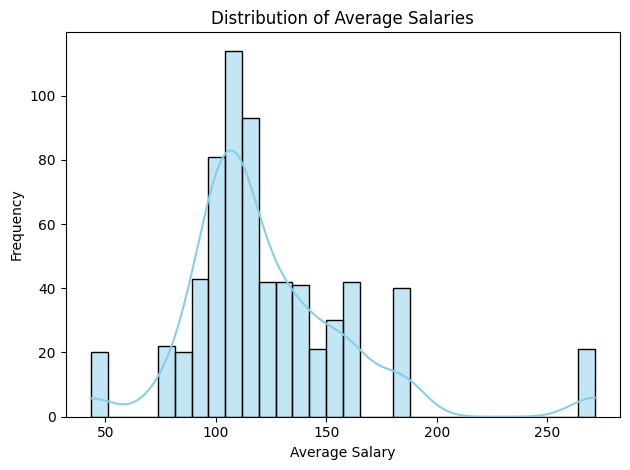

,X-axis (Variable),Y-axis (Metric),Plot Type,Insight
0,avg_salary,Frequency,Histogram with KDE,Shows distribution of average salary across da...


In [30]:
# 🔍 Step 4.1b – Univariate Analysis: Salary Distribution
# Understand how salary is distributed.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Ensure directory exists
os.makedirs("EDA_plots", exist_ok=True)

# Histogram for average salary
sns.histplot(df['avg_salary'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Average Salaries')
plt.xlabel('Average Salary')
plt.ylabel('Frequency')
plt.tight_layout()

# Save the plot
plot_path = "EDA_plots/salary_distribution.png"
plt.savefig(plot_path)
plt.show()

# Create and display the summary table
summary_table = pd.DataFrame({
    'X-axis (Variable)': ['avg_salary'],
    'Y-axis (Metric)': ['Frequency'],
    'Plot Type': ['Histogram with KDE'],
    'Insight': ['Shows distribution of average salary across dataset']
})

# Display the table
display(summary_table)

# Save the summary table
summary_path = "EDA_plots/salary_distribution_summary.csv"
summary_table.to_csv(summary_path, index=False)

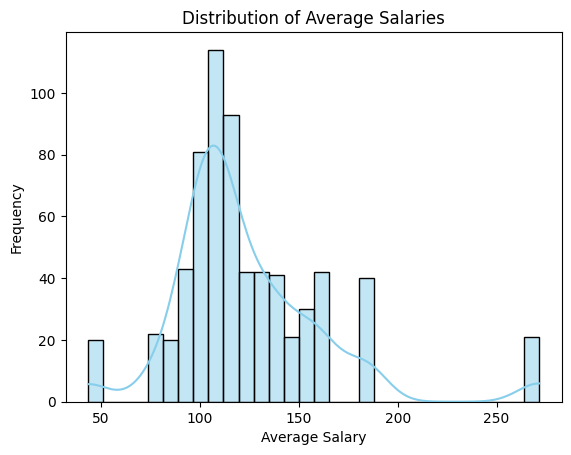

In [10]:
# 📍 Step 4.2 – Distribution of Salary Estimates
# Visualize the distribution of average salaries.

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['avg_salary'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Average Salaries')
plt.xlabel('Average Salary')
plt.ylabel('Frequency')
plt.show()


C:\Users\HP USER\AppData\Local\Temp\ipykernel_19620\2252648059.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.values[:10], y=location_counts.index[:10], palette='viridis')


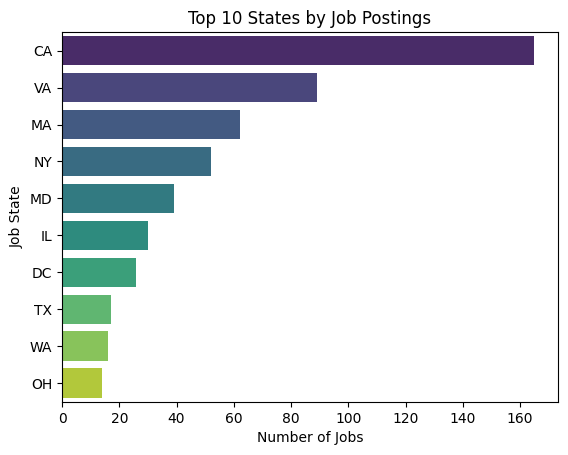

In [16]:
# 🗺️ Step 4.3 – Geographical Spread of Jobs
# Determine where job postings are most concentrated.
location_counts = df['Job State'].value_counts()

sns.barplot(x=location_counts.values[:10], y=location_counts.index[:10], palette='viridis')
plt.title('Top 10 States by Job Postings')
plt.xlabel('Number of Jobs')
plt.ylabel('Job State')
plt.show()

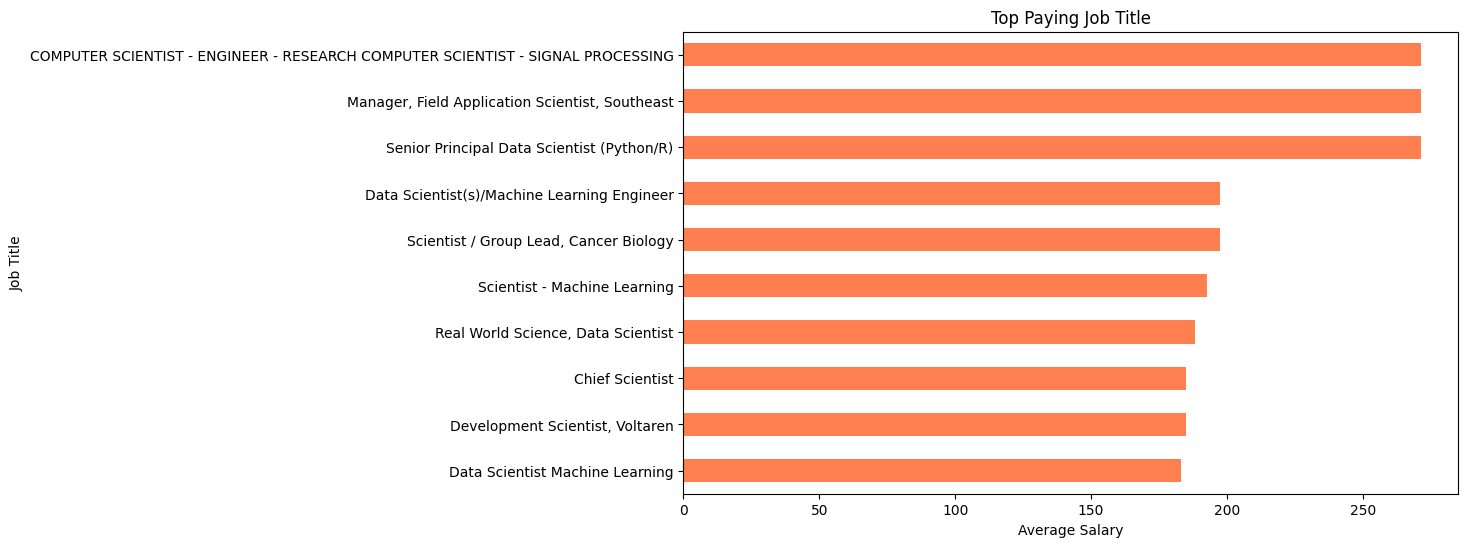

In [20]:
# 💼 Step 4.4 – Salary vs. Job Role
# Compare average salaries across job roles.
avg_salary_by_role = df.groupby('Job Title')['avg_salary'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
avg_salary_by_role.head(10).plot(kind='barh', color='coral')
plt.title('Top Paying Job Title')
plt.xlabel('Average Salary')
plt.gca().invert_yaxis()
plt.show()

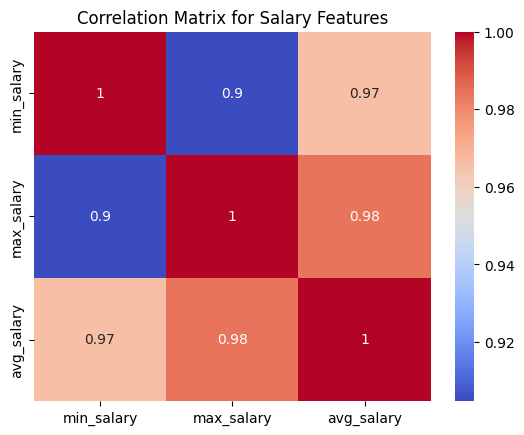

In [22]:
# 📊 Step 4.5 – Correlation Heatmap
# Examine correlations between numerical features.
correlation_matrix = df[['min_salary', 'max_salary', 'avg_salary']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Salary Features')
plt.show()

In [24]:
# ☁️ Step 4.6 – Most In-Demand Skills
# Show frequency of top 10 skills from extracted keywords.
skill_counts = skill_freq.sort_values(ascending=False).head(10)

sns.barplot(x=skill_counts.values, y=skill_counts.index, color='steelblue')
plt.title('Top 10 In-Demand Skills')
plt.xlabel('Frequency')
plt.ylabel('Skill')
plt.show()

NameError: name 'skill_freq' is not defined